In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.sparse import csr_matrix
from scipy.spatial import distance
import os
import warnings; warnings.simplefilter('ignore')
import anndata
import scrublet as scr

import seaborn as sns
sns.set_style('white')

np.random.seed(0)
sc.settings.verbosity = 3 
sc.set_figure_params(scanpy=True, dpi=80)

In [2]:
sc.logging.print_versions()

scanpy==1.4.5 anndata==0.7.5 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


### 7A

In [3]:
# downloaded from Bassez, A. et al. A single-cell map of intratumoral changes during 
# anti-PD1 treatment of patients with breast cancer.
adata = sc.read('bassez_c1_labeled.h5ad')

In [4]:
adata = adata[(adata.obs['label'] == 'CD4 CXCL13-') | (adata.obs['label'] == 'CD4 Treg') | (adata.obs['label'] == 'CD4 CXCL13+ TCF7-')
             | (adata.obs['label'] == 'CD4 CXCL13+ TCF7+') | (adata.obs['label'] == 'CD4 CXCL13+ proliferating')]

In [5]:
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata, random_state = 1010,svd_solver='arpack',use_highly_variable=True)
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=10, random_state = 1010)
sc.tl.umap(adata, random_state = 1010, min_dist=0.2)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.var` of view, copying.


computing PCA with n_comps = 50
    on highly variable genes
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 10


/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:19)


In [6]:
sc.set_figure_params(scanpy=True, dpi=80)

/Users/cshasha/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:4204: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  (isinstance(c, collections.Iterable) and


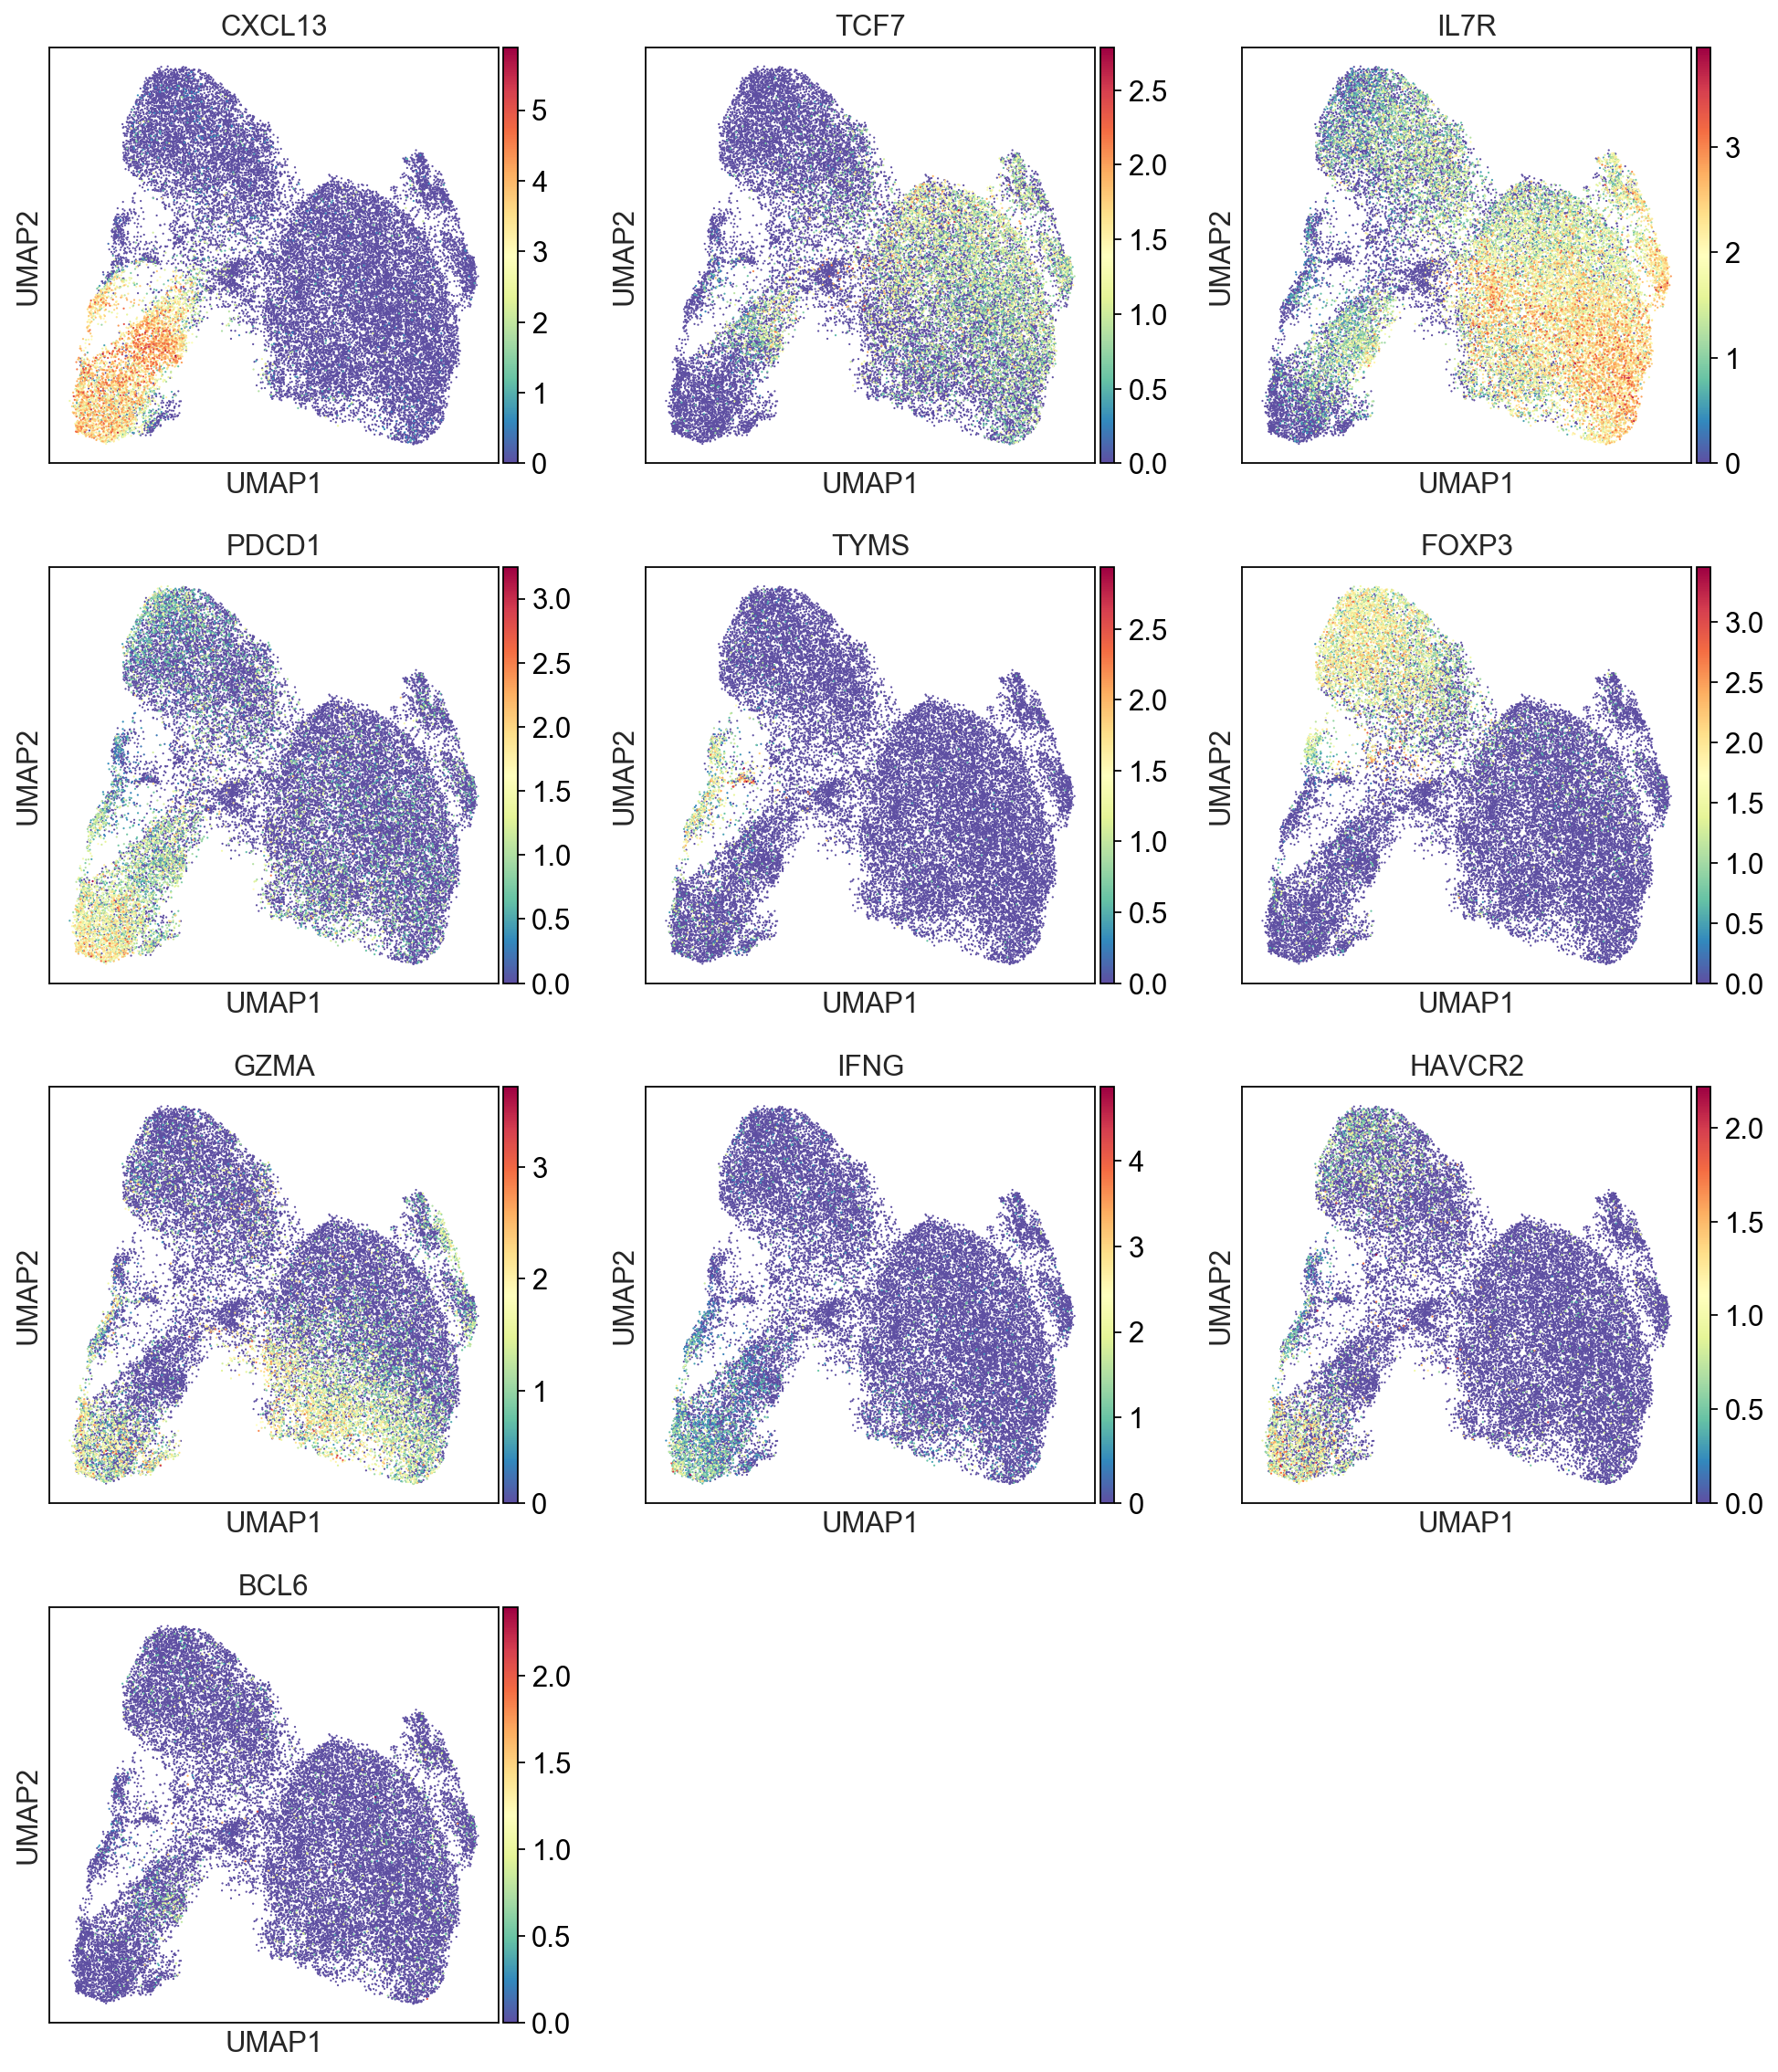

In [7]:
sc.pl.umap(adata,color=['CXCL13','TCF7','IL7R','PDCD1','TYMS','FOXP3','GZMA','IFNG','HAVCR2','BCL6'],
           cmap='Spectral_r',ncols=3)

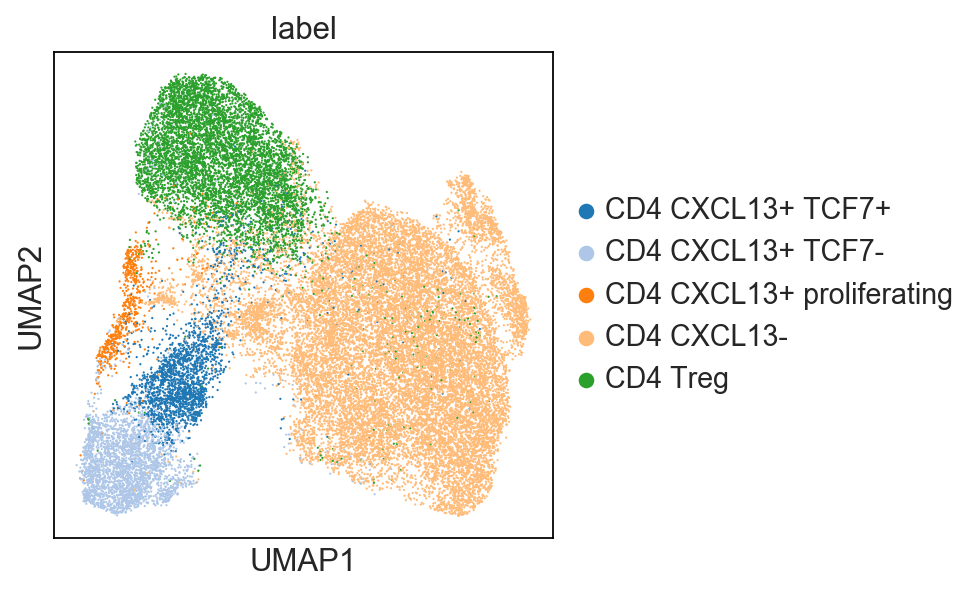

In [8]:
sc.pl.umap(adata,color='label',palette=sns.color_palette('tab20',5))